<font color="#5254A3" size=20>Alura Store</font>

<font size=4>Este projeto tem como objetivo analisar os dados de vendas das quatro lojas da rede Alura Store, pertencentes ao Sr. João, que pretende vender uma delas para investir em um novo negócio. Com base nessa análise, será apresentada uma recomendação que o ajude a decidir qual loja deve ser vendida</font>

## Importação dos dados



In [2]:
!pip install matplotlib

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import math

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja1, loja2, loja3, loja4]

In [26]:
loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [4]:
loja1.shape

(2359, 12)

In [5]:
loja1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


## 1. Análise do Faturamento

##### Obtendo o faturamento por loja e faturamento total com a soma de todas as loja.

In [6]:
def formatar_reais(valor):
  valor_formatado = f'{valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
  return valor_formatado


faturamento_total = 0

for i, loja in enumerate(lojas):
  faturamento = loja['Preço'].sum()
  faturamento_total +=  faturamento
  print(f'Faturamento da Loja {i + 1}: R$ {formatar_reais(faturamento)}')

print(f'\nFaturamento total: R$ {formatar_reais(faturamento_total)}')


Faturamento da Loja 1: R$ 1.534.509,12
Faturamento da Loja 2: R$ 1.488.459,06
Faturamento da Loja 3: R$ 1.464.025,03
Faturamento da Loja 4: R$ 1.384.497,58

Faturamento total: R$ 5.871.490,79


##### Função para gerar o gráfico de barras contendo o faturamento das quatro lojas.

In [7]:
def grafico_faturamento():
  faturamento_lojas = {}

  for i, loja in enumerate(lojas):
    faturamento = float(loja['Preço'].sum())
    chave = f'Loja {i + 1}'
    faturamento_lojas[chave] = faturamento

  plt.figure(figsize=(9, 5))
  plt.bar(list(faturamento_lojas.keys()), list(faturamento_lojas.values()), color=plt.cm.tab20b.colors)
  plt.margins(x=0.05,y=0.1)
  formatador = ticker.FuncFormatter(lambda x, pos: f'R$ {formatar_reais(x)}')
  plt.gca().yaxis.set_major_formatter(formatador)

  for i, valor in enumerate(list(faturamento_lojas.values())):
      plt.text(i, valor + 20, f'R${formatar_reais(valor)}', ha='center', va='bottom')

  plt.title('Análise do faturamento', fontsize=18)
  plt.xlabel('Lojas', fontsize=11)
  plt.ylabel('Faturamento (R$)', fontsize=11)
  plt.show()

## 2. Vendas por Categoria

##### Obtendo o número total e o faturamento das vendas por categoria de cada loja.

In [8]:
for i, loja in enumerate(lojas):
  loja['Categoria do Produto'] = loja['Categoria do Produto'].replace({
      'eletrodomesticos': 'eletrodomésticos',
      'eletronicos': 'eletrônicos',
      'moveis': 'móveis',
      'utilidades domesticas': 'utilidades domésticas'
  })

  for i, loja in enumerate(lojas):
    vendas_categoria = loja.groupby('Categoria do Produto').agg(
        { 'Produto': 'count', 'Preço': 'sum'}
    ).sort_values(by='Preço', ascending=False)

    vendas_categoria.columns = ['Quantidade', 'Valor (R$)']

  print(f'Vendas da Loja {i + 1} por Categoria \n\n {vendas_categoria} \n\n{"." * 46}\n')

Vendas da Loja 4 por Categoria 

                        Quantidade  Valor (R$)
Categoria do Produto                         
eletronicos                   451   545966.86
eletrodomesticos              254   377680.65
moveis                        480   256705.65
instrumentos musicais         170   100136.50
esporte e lazer               277    44465.65
brinquedos                    338    27015.67
utilidades domesticas         201    20098.83
livros                        187    12427.77 

..............................................

Vendas da Loja 4 por Categoria 

                        Quantidade  Valor (R$)
Categoria do Produto                         
eletronicos                   451   545966.86
eletrodomesticos              254   377680.65
moveis                        480   256705.65
instrumentos musicais         170   100136.50
esporte e lazer               277    44465.65
brinquedos                    338    27015.67
utilidades domesticas         201    20098.83
livros  

##### Função para gerar os gráficos de pizza das vendas por categoria.

In [9]:
def grafico_categoria():
  figura = plt.figure(figsize=(20, 9))
  figura.suptitle('\nVendas por Categoria', fontsize=28)

  cores_padrao = plt.rcParams['axes.prop_cycle'].by_key()['color']
  cores = ['#E32B2D', '#716CAD', '#C4285A', '#F6C457', '#E377C2', '#7F7F7F', '#58994C', '#EB822E']
  cores += cores_padrao

  for i, loja in enumerate(lojas):
    vendas_categoria = loja.groupby('Categoria do Produto').agg(
        { 'Produto': 'count', 'Preço': 'sum'}
    ).sort_values(by='Preço', ascending=False)

    total_vendas = vendas_categoria['Produto'].sum()

    figura.add_subplot(1, len(lojas), i + 1)
    wedges, texts, autotexts = plt.pie(
        vendas_categoria['Produto'], autopct=lambda pct: '', pctdistance=0.7, colors=cores,
        textprops={'color': '#000', 'fontsize': 12},
        wedgeprops={'edgecolor': '#000', 'linewidth': 1}
    )
    plt.title(f'Loja {i + 1}', fontsize=19)

    for j, txt in enumerate(vendas_categoria['Produto']):
      autotexts[j].set_text(str(txt))

    plt.text(0, -1.3, f'Total de vendas: {total_vendas}', ha='center', fontsize=14,
              bbox=dict(boxstyle='round,pad=0.4', edgecolor='black', facecolor='#fefefe'))

    dados_legenda = list(zip(vendas_categoria.index.str.title(), vendas_categoria['Preço'], cores))

    labels_legenda_formatada = [
        f'{categoria} (R${formatar_reais(valor)})'
        for categoria, valor, _ in dados_legenda
    ]
    handles_legenda = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cor, markeredgecolor='#000', markersize=14)
        for _, _, cor in dados_legenda
    ]
    legenda = plt.legend( handles=handles_legenda, labels=labels_legenda_formatada, title=f'Categorias - Loja {i + 1}',
        loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=13, labelspacing=1.2, borderpad=1.2
    )
    legenda.get_title().set_fontsize(17)

  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.subplots_adjust(hspace=0.1, wspace=0.1)
  plt.show(figura)


## 3. Média de Avaliação das Lojas

##### Analisando a média de avaliação das lojas.

In [10]:
def media_avaliacao(loja):
  media_avaliacoes = loja['Avaliação da compra'].astype(float).mean()
  return media_avaliacoes

def formatar_media(media):
  return str(media)[:str(media).find(".") + 3]

medias_avaliacoes_lojas = list(map(media_avaliacao, lojas))

for i, media_avaliacao in enumerate(medias_avaliacoes_lojas):
  print(f'Média de Avaliação da Loja {i + 1}: {formatar_media(media_avaliacao)} \n')

Média de Avaliação da Loja 1: 3.97 

Média de Avaliação da Loja 2: 4.03 

Média de Avaliação da Loja 3: 4.04 

Média de Avaliação da Loja 4: 3.99 



##### Função para criação do gráfico de barras lateral para comparação das médias de avaliação das lojas.

In [11]:
lista_de_lojas = []
for i in range (len(lojas)):
    lista_de_lojas.append(f'Loja {i + 1}')

def grafico_medias_avaliacoes():
  dados_ordenados = sorted(zip(lista_de_lojas, medias_avaliacoes_lojas), key=lambda x: x[1])
  lojas_ordenadas, medias_avaliacoes_ordenadas = zip(*dados_ordenados)
  plt.barh(lojas_ordenadas, medias_avaliacoes_ordenadas, color=plt.cm.magma(np.linspace(0.6, 0.4, len(lojas))))
  plt.margins(x=0.07,y=0.05)
  plt.title('Médias de Avaliação das Lojas', fontsize=18)

  formatador = ticker.StrMethodFormatter('{x:,.2f}')
  plt.gca().xaxis.set_major_formatter(formatador)
  plt.grid(True, axis='x', linestyle='--', color='#222', alpha=0.6)

  for i, valor in enumerate(medias_avaliacoes_ordenadas):
    plt.text(valor + 0.15, i, f'{formatar_media(valor)}', ha='right', va='center', rotation=-90)

## 4. Produtos Mais e Menos Vendidos

##### Obtendo os 5 produtos mais e menos vendidos por loja.

In [12]:
def vendas_produtos(loja):
  arrecadacao_produtos = loja.groupby('Produto')['Preço'].sum()
  vendas_produtos = loja.groupby('Produto')['Produto'].count()
  return vendas_produtos, arrecadacao_produtos


def produtos_mais_vendidos(loja):
  quantidade_vendas, arrecadacao = vendas_produtos(loja)
  top5_mais_vendidos = quantidade_vendas.sort_values(ascending=False).head(5)

  arrecadacao_top5_mais = arrecadacao.loc[top5_mais_vendidos.index]
  return top5_mais_vendidos, arrecadacao_top5_mais


def produtos_menos_vendidos(loja):
  quantidade_vendas, arrecadacao = vendas_produtos(loja)
  top5_menos_vendidos = quantidade_vendas.sort_values(ascending=True).head(5)

  arrecadacao_top5_menos = arrecadacao.loc[top5_menos_vendidos.index]
  return top5_menos_vendidos, arrecadacao_top5_menos


# Imprimindo os 5 produtos Mais Vendidos
for i, loja in enumerate(lojas):
  mais_vendidos, arrecadado = produtos_mais_vendidos(loja)
  print(f'Total dos 5 produtos mais vendidos - Loja {i + 1}: R${formatar_reais(arrecadado.sum())} ({mais_vendidos.sum()} itens)')

print()

# Imprimindo os 5 produtos Menos Vendidos
for i, loja in enumerate(lojas):
  menos_vendidos, arrecadado = produtos_menos_vendidos(loja)
  print(f'Total dos 5 produtos menos vendidos - Loja {i + 1}: R${formatar_reais(arrecadado.sum())} ({menos_vendidos.sum()} itens)')

Total dos 5 produtos mais vendidos - Loja 1: R$356.403,42 (294 itens)
Total dos 5 produtos mais vendidos - Loja 2: R$143.824,33 (304 itens)
Total dos 5 produtos mais vendidos - Loja 3: R$125.229,48 (279 itens)
Total dos 5 produtos mais vendidos - Loja 4: R$120.380,63 (288 itens)

Total dos 5 produtos menos vendidos - Loja 1: R$59.085,26 (176 itens)
Total dos 5 produtos menos vendidos - Loja 2: R$49.089,86 (172 itens)
Total dos 5 produtos menos vendidos - Loja 3: R$73.329,09 (181 itens)
Total dos 5 produtos menos vendidos - Loja 4: R$144.099,25 (180 itens)


##### Função para gerar os gráficos com os produtos mais e menos vendidos em cada loja.

In [13]:
def grafico_top_n(top_n_produtos, titulo, cores):
  figura = plt.figure(figsize=(24, 10.2))
  figura.suptitle(f'\nTop {titulo}\n', fontsize = 24, y=1)

  for i, loja in enumerate(lojas):
    figura.add_subplot(1, len(lojas), i + 1)
    top_vendidos, arrecadacao = top_n_produtos(loja)
    barras = plt.bar(top_vendidos.index, top_vendidos.values, color=cores)
    ax = plt.gca()
    plt.title(f'Loja {i + 1} - {titulo}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Quantidade de Itens Vendidos')
    plt.margins(x=0.05,y=0.12)
    for j, quantidade in enumerate(list(top_vendidos)):
      plt.text(j, quantidade + 1, quantidade, ha='center', va='bottom')

    for barra, valor in zip(barras, arrecadacao.values):
      barra.set_label(f'R${formatar_reais(valor)}')

      legenda = plt.legend(title=f'Total em Vendas por Produto - Loja {i + 1}', loc='upper center',
                      bbox_to_anchor=(0.5, -0.48), fontsize=12, labelspacing=1, borderpad=1.2, borderaxespad=1.5, alignment='left')

      ax.text(0.5, -1.5, s=f'Total em Vendas dos 5 Produtos: R${formatar_reais(arrecadacao.sum())}',
                  ha='center', va='top', fontsize=13, transform=ax.transAxes, clip_on=False,
                  bbox=dict(boxstyle='round,pad=0.9', edgecolor='black', facecolor='#fefefe')
              )
    legenda.get_title().set_fontsize(15)
    legenda.get_title().set_ha('center')

  plt.subplots_adjust(hspace=0.15, top=0.85, bottom=0.55)
  plt.show()

## 5. Frete Médio por Loja

##### Calculando o frete médio por loja.

In [14]:
def frete_medio_lojas(loja):
  frete_medio_lojas = loja['Frete'].astype(float).mean()
  return frete_medio_lojas

frete_medio_lojas = list(map(frete_medio_lojas, lojas))

for i, frete_medio_loja in enumerate(frete_medio_lojas):
  print(f'Frete Médio por Loja {i + 1}: R${formatar_reais(frete_medio_loja)} \n')

Frete Médio por Loja 1: R$34,69 

Frete Médio por Loja 2: R$33,62 

Frete Médio por Loja 3: R$33,07 

Frete Médio por Loja 4: R$31,28 



##### Calculando o frete médio de cada loja por categoria.

In [27]:
def frete_medio_por_categoria():
  frete_medio_categorias = []

  for i, loja in enumerate(lojas):
      loja['Frete'] = loja['Frete'].astype(float)
      medias = loja.groupby('Categoria do Produto')['Frete'].mean().round(2)
      medias.name = f'Loja {i+1}'
      frete_medio_categorias.append(medias)

  frete_medio_categoria = pd.concat(frete_medio_categorias, axis=1).reset_index()
  return frete_medio_categoria

frete_medio_por_categoria()

,Categoria do Produto,Loja 1,Loja 2,Loja 3,Loja 4
0,brinquedos,4.03,3.78,4.41,4.39
1,eletrodomesticos,82.58,81.12,83.90,78.86
2,eletronicos,68.35,68.92,64.61,64.53
3,esporte e lazer,9.96,9.10,9.26,8.52
4,instrumentos musicais,35.78,33.08,30.95,31.01
5,livros,3.60,3.76,3.58,3.86
6,moveis,28.66,28.47,28.82,28.43
7,utilidades domesticas,5.02,5.90,6.12,5.67


##### Função que gera um gráfico de linha com o frete médio das lojas.

In [16]:
def grafico_frete_medio():
  plt.figure(figsize=(10, 5))
  plt.plot(lista_de_lojas, frete_medio_lojas, color='w', marker='o')
  plt.gcf().set_facecolor('#356080')
  plt.gca().set_facecolor('none')

  cor = '#ccc'; cor2 = '#bbb'
  ax = plt.gca()
  ax.tick_params(colors=cor)
  [spine.set_color(cor) for spine in ax.spines.values()]

  minimo = round(min(frete_medio_lojas))
  maximo = round(max(frete_medio_lojas))
  plt.axis(ymin=0, ymax=maximo + 5)
  plt.grid(True, axis='both', linestyle='--', color=cor2, alpha=0.6)
  plt.margins(x=0.12,y=0.05)
  plt.title('Frete Médio por Loja', color='#f5f5f5', fontsize=18)
  plt.ylabel('Frete Médio (R$)', color=cor2, fontsize=11)
  plt.xlabel('Lojas', color=cor2, fontsize=11)

  formatador = ticker.FuncFormatter(lambda x, pos: f'R$ {formatar_reais(x)}')
  plt.gca().yaxis.set_major_formatter(formatador)

  for i in range(len(lista_de_lojas)):
    plt.text(lista_de_lojas[i], frete_medio_lojas[i] + 0.5, f' R${formatar_reais(frete_medio_lojas[i])}', ha='left', va='baseline', color='w')

  plt.grid(True)
  plt.show()

---

# Relatório

Neste relatório, serão mostradas as visualizações geradas e informações e insights importantes obtidos a partir da análise dos dados de vendas das quatro lojas da rede Alura Store, que servirão de apoio à decisão do Sr. João sobre qual loja vender.

## Análise do Faturamento

* A diferença entre as lojas não é muito acentuada, o que indica um desempenho relativamente equilibrado entre elas.

* A **Loja 1** possui o maior **faturamento**, uma diferença de aproximadamente R\$ 150 mil em relação à **Loja 4**, que possui o menor **faturamento**.

* Ainda assim, a **Loja 4** mantém um bom desempenho, com pouco mais de R$ 1,38 milhão em **faturamento**.

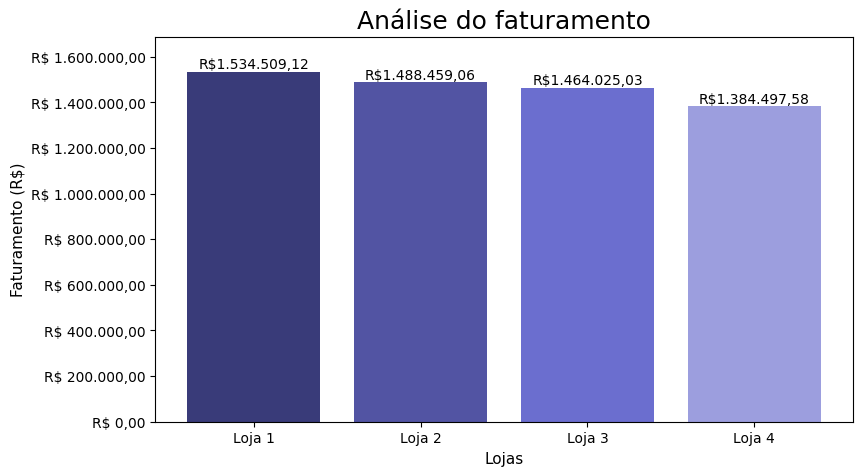

In [17]:
grafico_faturamento()

## Vendas por Categoria

* Todas as lojas possuem perfil semelhante, com destaque para as vendas de eletrônicos, que lidera tanto em quantidade vendida quanto em faturamento;

* A **Loja 1** continua como a que mais fatura nas categorias-chave;

* Apesar de registrar um bom volume de vendas, a **Loja 4** apresenta menor faturamento em diversas categorias, especialmente nas de maior valor agregado.

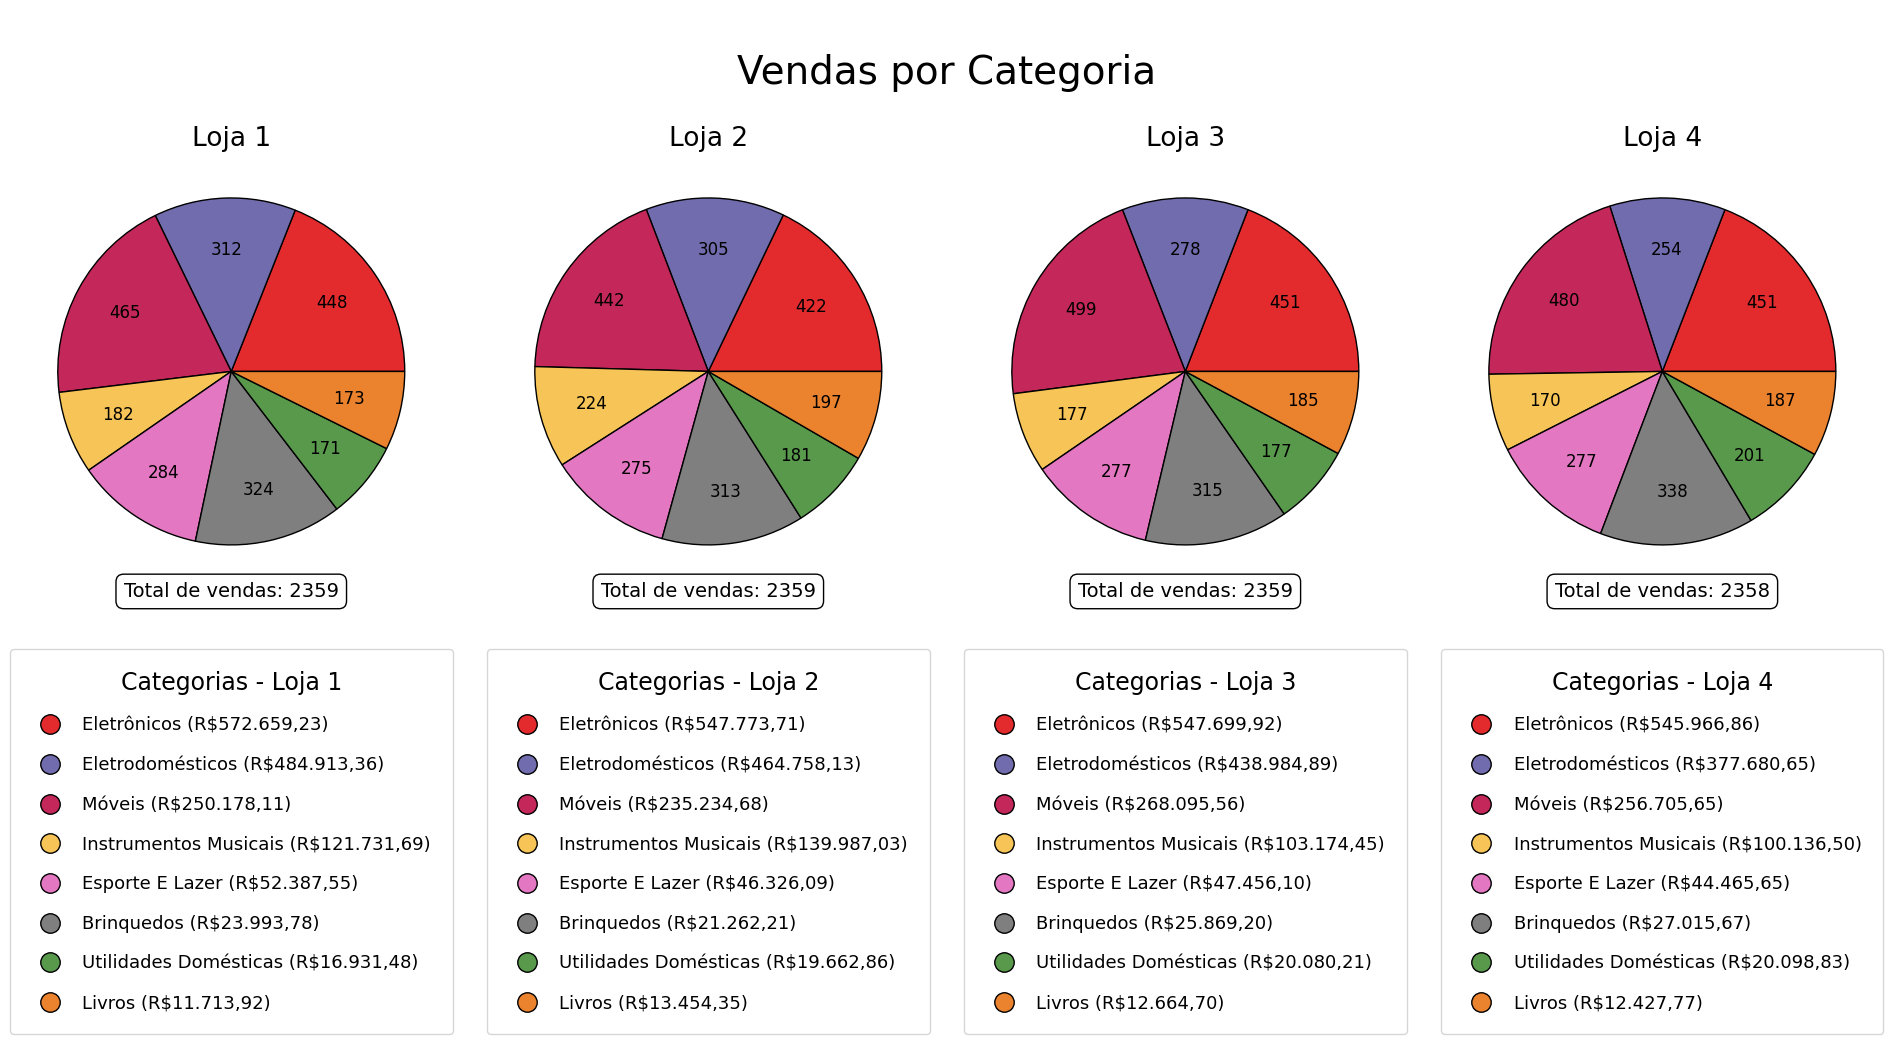

In [18]:
grafico_categoria()

## Média de Avaliação das Lojas

* As **médias de avaliação** das lojas são bastante próximas, indicando um nível de satisfação geral relativamente uniforme entre os clientes;

* A **Loja 3** se destaca levemente com a melhor média (4.04), seguida de perto pela **Loja 2** (4.03);

* A **Loja 1** apresenta a menor média (3.97), o que, embora ainda seja uma nota alta, pode sugerir pontos de melhoria na experiência do cliente;

* A **loja 4** é possui a segunda pior avaliação com média (3.99), mas ainda assim, é uma média razoável.

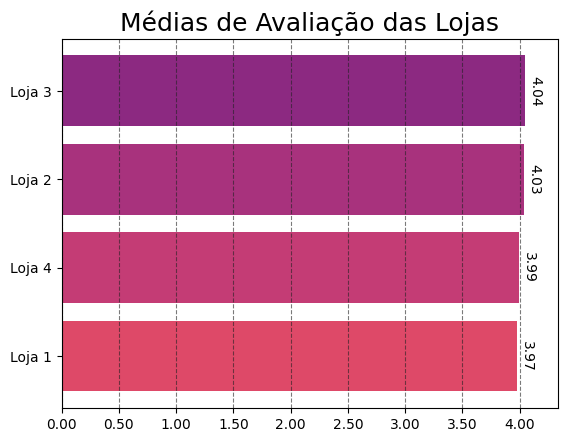

In [19]:
grafico_medias_avaliacoes()

## Produtos Mais e Menos Vendidos

### Top 5 Produtos Mais Vendidos

* Apesar de as quantidades vendidas dos **produtos mais populares** serem semelhantes entre as lojas, o faturamento total gerado por esses itens varia bastante;

* A **Loja 1** se destaca com ampla vantagem, alcançando R\$ 356.403,42, impulsionada principalmente pela venda de TVs 4K, com valor unitário elevado;

* A **Loja 2**, embora tenha vendido até mais unidades de alguns produtos, apresenta um faturamento consideravelmente menor em comparação com a **Loja 1**, somando R\$ 143.824,33, o que indica a predominância de itens de menor valor agregado;

* A **Loja 3** e a **Loja 4** mantêm desempenho semelhante em quantidade vendida, mas a Loja 3 atinge R\$ 125.229,48, enquanto a **Loja 4** soma R\$ 120.380,63, com ligeira vantagem para a primeira; <br><br>

> Esses dados reforçam que o valor unitário dos produtos tem impacto direto no faturamento, sendo um diferencial competitivo mais relevante que a simples quantidade vendida.

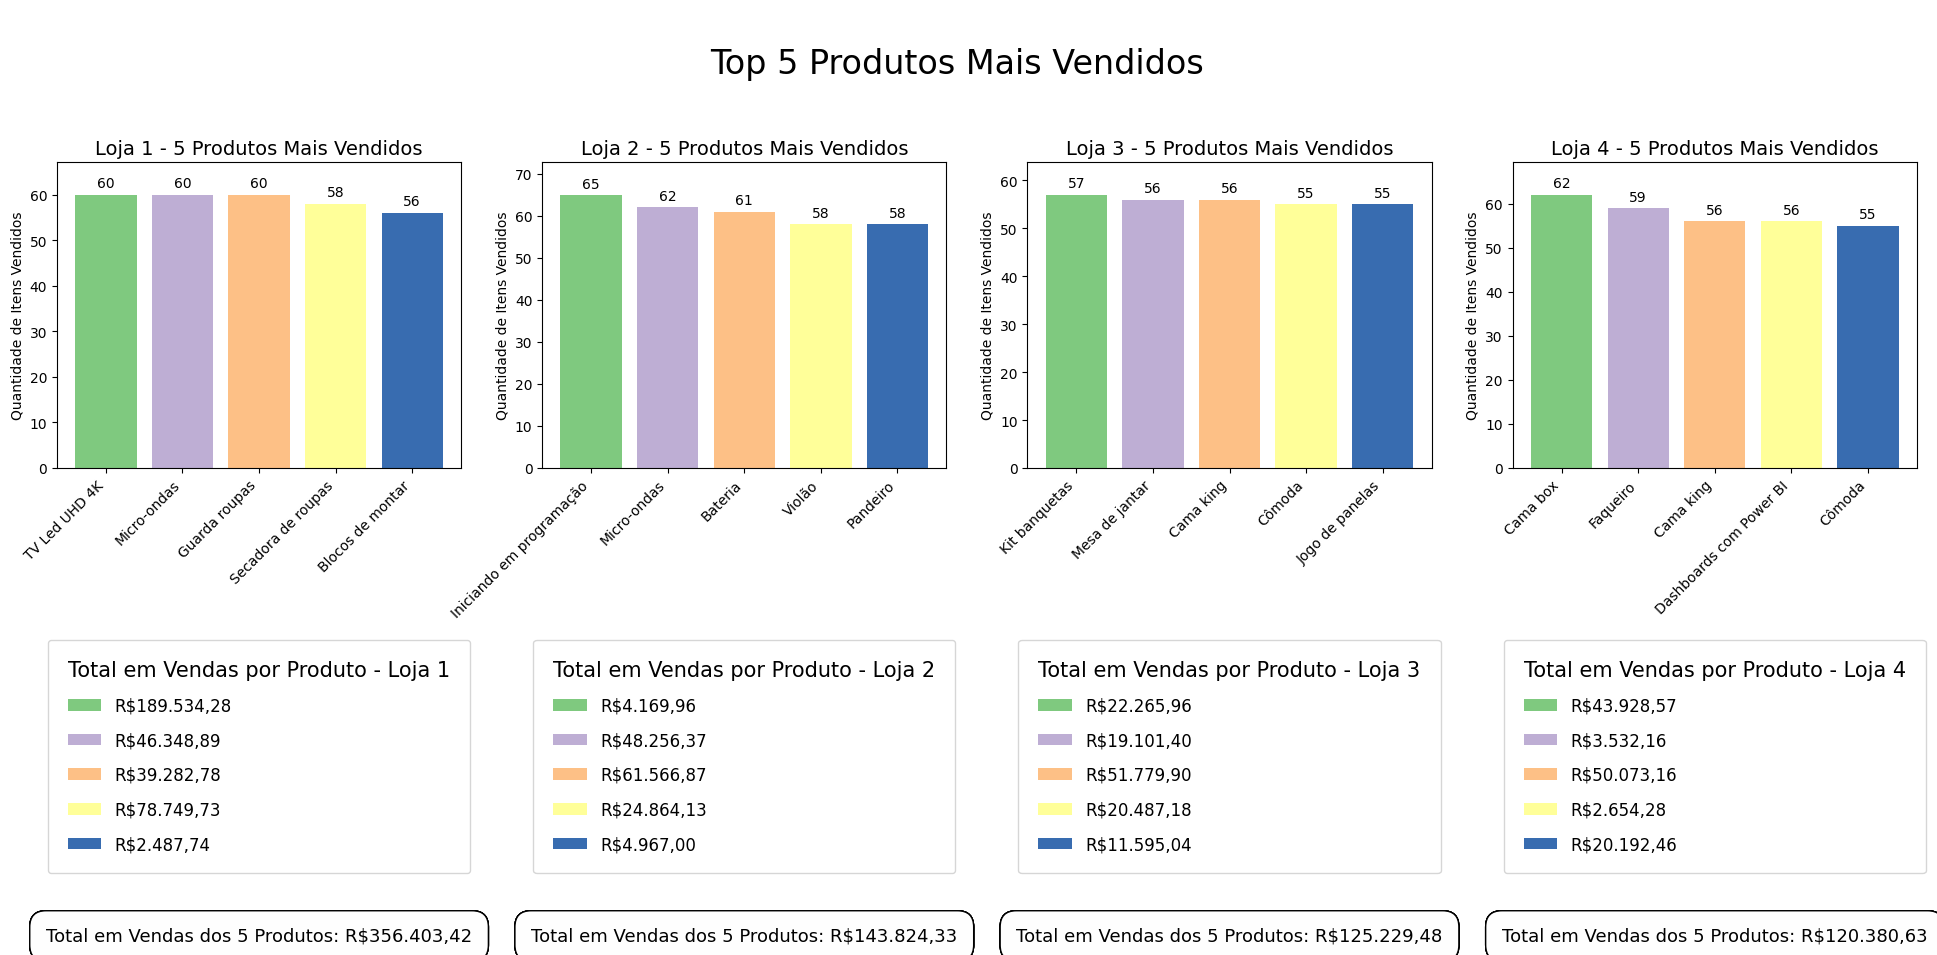

In [20]:
cores = plt.cm.Accent.colors[: -1]
titulo = '5 Produtos Mais Vendidos'
grafico_top_n(produtos_mais_vendidos, titulo, cores)

### Top 5 Produtos Menos Vendidos

* Embora os **produtos menos vendidos** apresentem quantidades semelhantes entre as lojas, entre 55 e 65 unidades por loja, o faturamento total desses itens varia significativamente.

* A **Loja 4** se destaca com o maior faturamento entre os produtos de menor saída, somando R\$ 144.099,25, impulsionada principalmente pelas vendas de lavadoras de roupas, guitarras e guarda-roupas. Ou seja, mesmo com baixa demanda, esses itens geram receita significativa. Por outro lado, isso pode representar um risco de acúmulo de estoque caro parado, sujeito à deterioração e desvalorização caso a rotatividade seja baixa. Além disso, ao depender de poucos produtos caros para equilibrar o faturamento, a loja fica mais vulnerável a oscilações na demanda desses itens.

* Em seguida, a **Loja 3** aparece com R\$ 73.329,09, puxada pelo alto valor das guitarras e dos micro-ondas entre os menos vendidos.

* Já as **Lojas 1** e **2** apresentam os menores faturamentos nesse grupo de produtos, com `R$ 59.085,26` e `R$ 49.089,86`, respectivamente, cerca de `R\$ 85` mil e `R\$ 95` mil a menos que a **Loja 4**. Isso reflete a presença de itens de menor valor agregado entre os produtos de baixa saída nessas lojas.

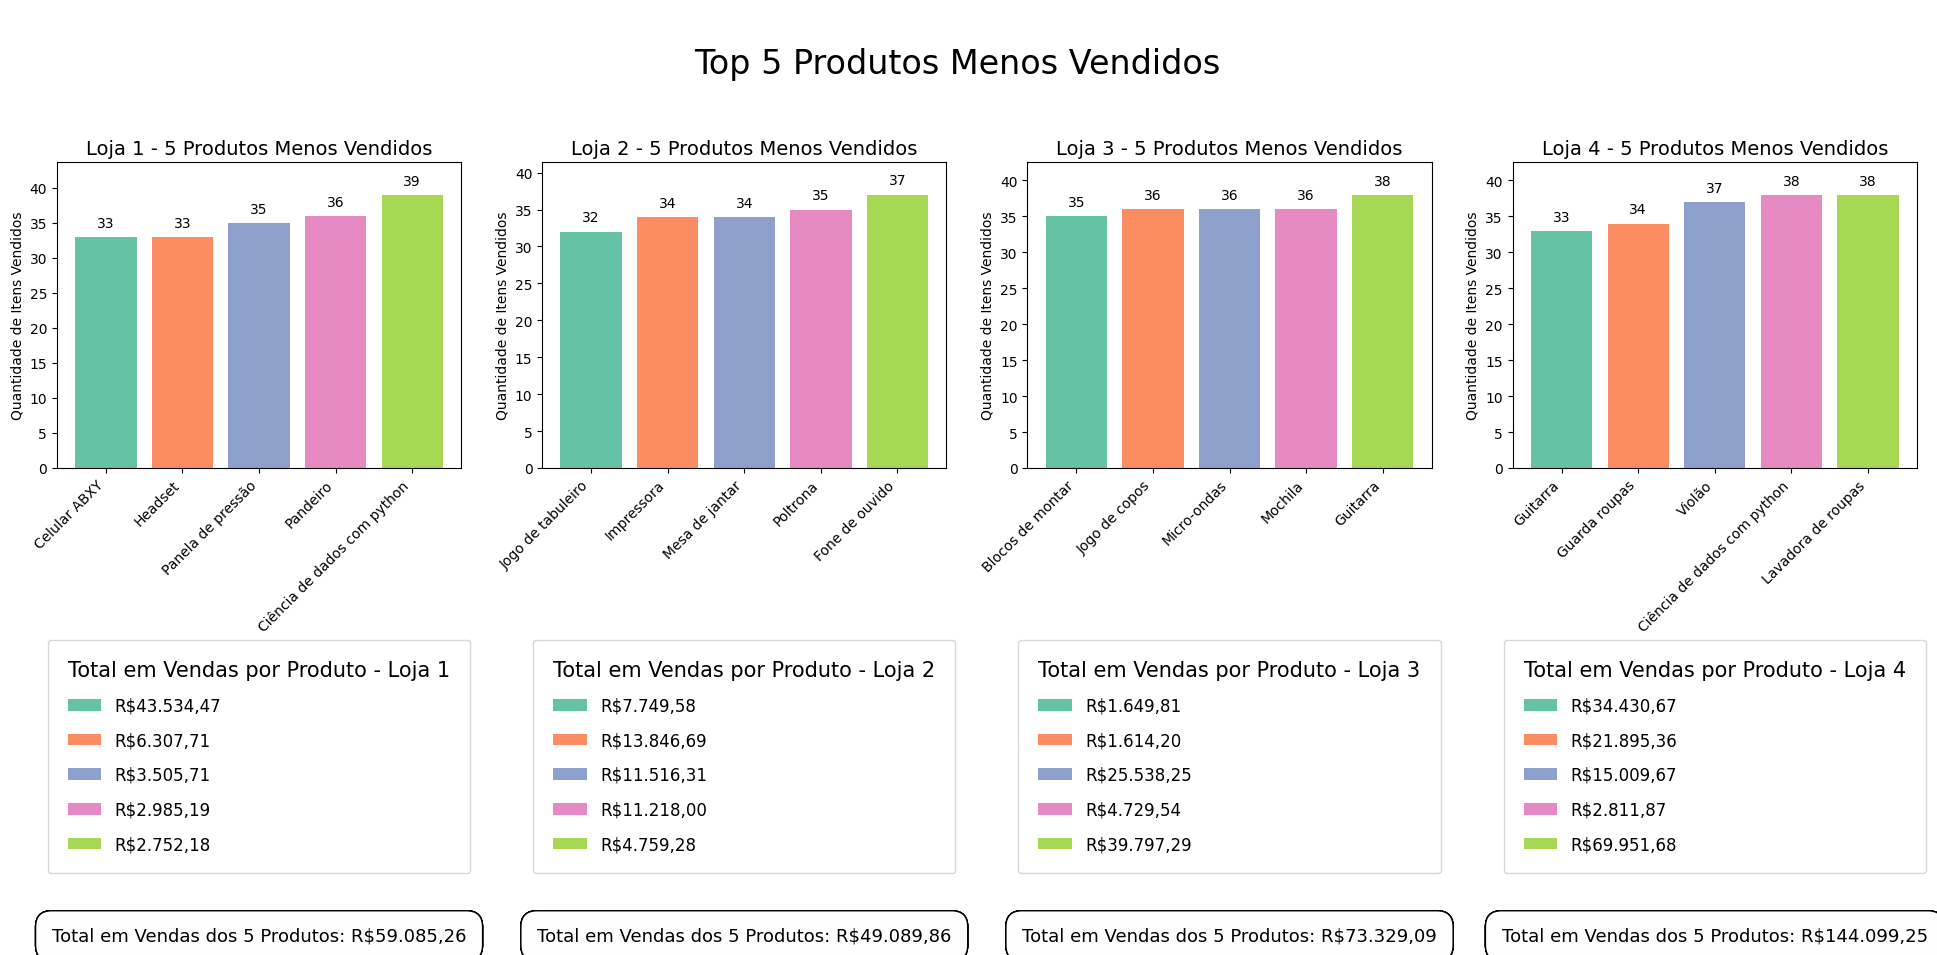

In [21]:
cores = plt.cm.Set2.colors[: -1]
titulo = '5 Produtos Menos Vendidos'
grafico_top_n(produtos_menos_vendidos, titulo, cores)

## Frete Médio por Loja

O **frete médio** da **Loja 1** é o mais elevado, o que pode ser explicado pelo maior volume de vendas de produtos de alto valor, que exigem mais cuidado e, consequentemente, um custo logístico maior.

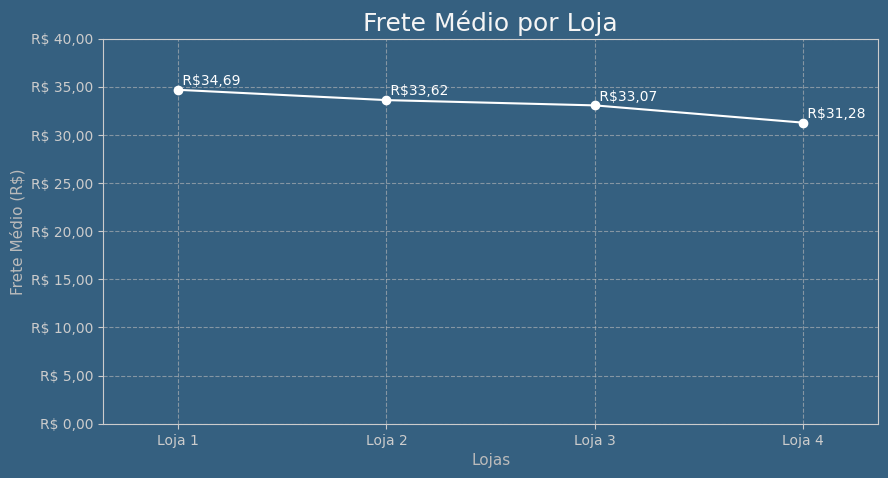

In [22]:
grafico_frete_medio()

## Conclusão

Com base na análise dos dados de vendas das lojas, incluindo análises gráficas, considerando aspectos como: **faturamento**, **vendas por categoria**, **médias de avaliação** das lojas, **produtos mais e menos vendidos** em cada loja e **frete médio** por loja, foi possível concluir as seguintes informações:

1. A **Loja 1** é a mais forte em faturamento total, com excelente desempenho nas categorias principais e produtos mais vendidos com ticket médio alto (294 itens = R\$ 356 mil). Apesar de uma avaliação ligeiramente menor e frete mais caro, destaca-se pela alta lucratividade por unidade vendida e baixo volume de itens caros encalhados, o que reforça seu potencial de rentabilidade e valor de mercado.

2. A **Loja 2** vendeu o maior número de itens entre os mais vendidos (304) e tem a menor quantidade e valor acumulado entre os produtos encalhados, o que indica alta rotatividade de estoque. Avaliação excelente (4.03), bom faturamento e frete equilibrado.

3. A **Loja 3** tem a melhor avaliação dos clientes (4.04), com desempenho sólido em faturamento e frete. Apesar de vender produtos mais baratos e acumular um pouco mais de itens de baixa saída.

4. A **Loja 4** apresenta o pior desempenho geral: menor faturamento, menor valor nos produtos mais vendidos e o maior valor acumulado em produtos com baixa saída, mesmo com frete mais barato e avaliação razoável.

**Recomendação:** Se o objetivo for se desfazer da loja com menor rentabilidade e possível acúmulo de itens de maior valor agregado no estoque, o ideal seria **vender a Loja 4**. Por outro lado, se a meta for obter o maior retorno financeiro para maximizar o capital a ser investido no novo negócio do Sr. João, **vender a Loja 1** será, com certeza, **a opção mais rentável**, por ser a loja com maior potencial de valor de mercado.